In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento de dados

In [2]:
#Importando bando de dados com pandas
dataset = pd.read_csv('./dataset/cars.csv',
                      header=0,encoding = 'unicode_escape')
# Seleciona apenas uma fração do dataset
dataset = dataset.sample(frac=0.009)
dataset

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
7650,Mini,Cooper S,mechanical,blue,139000,2007,gasoline,False,gasoline,1.6,...,False,True,False,True,False,False,False,True,True,62
29649,BMW,525,automatic,black,328000,2005,gasoline,False,gasoline,2.5,...,True,True,True,False,True,True,False,True,True,59
3306,Opel,Astra,mechanical,grey,293000,2005,gasoline,False,gasoline,1.4,...,True,False,False,False,False,False,False,False,False,36
29808,BMW,520,mechanical,violet,300000,1996,gasoline,False,gasoline,2.0,...,True,True,False,False,False,False,False,False,True,85
7320,Citroen,Saxo,mechanical,red,277735,2000,gasoline,False,gasoline,1.1,...,False,False,False,False,False,False,False,False,False,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780,BMW,320,automatic,grey,78000,2016,diesel,False,diesel,2.0,...,True,False,True,True,True,True,True,True,True,17
27073,Nissan,Almera,mechanical,silver,408000,1996,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,False,73
27953,BMW,X5,automatic,silver,156000,2010,gasoline,False,gasoline,4.4,...,True,True,True,True,True,True,True,True,True,88
23175,Toyota,Corolla Verso,mechanical,black,312000,2008,diesel,False,diesel,2.2,...,True,False,False,False,False,False,False,True,True,91


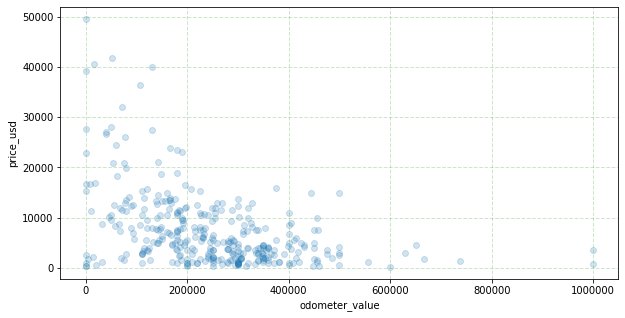

In [3]:
dataset = dataset.drop('manufacturer_name', axis=1)
dataset = dataset.drop('model_name', axis=1)
dataset = dataset.drop('transmission', axis=1)
dataset = dataset.drop('color', axis=1)
dataset = dataset.drop('year_produced', axis=1)
dataset = dataset.drop('engine_fuel', axis=1)
dataset = dataset.drop('engine_has_gas', axis=1)
dataset = dataset.drop('engine_type', axis=1)
dataset = dataset.drop('engine_capacity', axis=1)
dataset = dataset.drop('body_type', axis=1)
dataset = dataset.drop('has_warranty', axis=1)
dataset = dataset.drop('state', axis=1)
dataset = dataset.drop('drivetrain', axis=1)
dataset = dataset.drop('is_exchangeable', axis=1)
dataset = dataset.drop('number_of_photos', axis=1)
dataset = dataset.drop('location_region', axis=1)
dataset = dataset.drop('up_counter', axis=1)
dataset = dataset.drop('feature_0', axis=1)
dataset = dataset.drop('feature_1', axis=1)
dataset = dataset.drop('feature_2', axis=1)
dataset = dataset.drop('feature_3', axis=1)
dataset = dataset.drop('feature_4', axis=1)
dataset = dataset.drop('feature_5', axis=1)
dataset = dataset.drop('feature_6', axis=1)
dataset = dataset.drop('feature_7', axis=1)
dataset = dataset.drop('feature_8', axis=1)
dataset = dataset.drop('feature_9', axis=1)
dataset = dataset.drop('duration_listed', axis=1)


plt.figure(figsize=(10, 5))
plt.scatter(dataset["odometer_value"], dataset["price_usd"], alpha=.2)
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [4]:
#  Um grande quantidades de valores nulos, e para muitas dessas categorias não 
# há uma interpretação intuitiva para nulo. 
# No entanto, esse é um conjunto de dados tão grande que a 
# remoção de todos os nulos representa apenas cerca de 10% dos dados. Então, vamos fazer isso.

dataset = dataset.dropna(axis = 0)


dataset.isnull().sum()

odometer_value    0
price_usd         0
dtype: int64

In [5]:
#  Reduzindo os valores da coluna Price que estão com muita dispersao

dataset['price_usd'] = (dataset['price_usd'] / 1000)
dataset['odometer_value'] = (dataset['odometer_value'] / 10000)
dataset.describe(include='all')

,odometer_value,price_usd
count,347.000000,347.000000
mean,24.416238,7.397814
std,14.322441,7.459757
min,0.000000,0.250000
25%,14.750000,2.225000
50%,23.500000,5.150000
75%,32.650000,10.500000
max,100.000000,49.500000


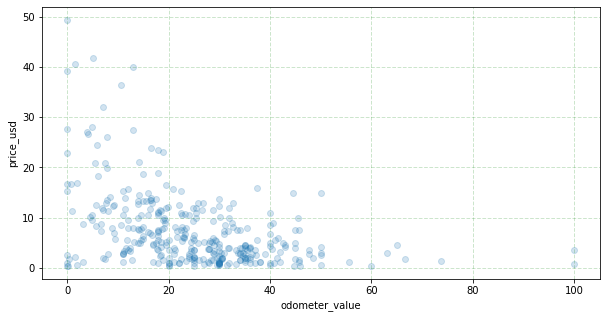

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset["odometer_value"], dataset["price_usd"], alpha=.2)
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [7]:
dataset.describe(include='all')

,odometer_value,price_usd
count,347.000000,347.000000
mean,24.416238,7.397814
std,14.322441,7.459757
min,0.000000,0.250000
25%,14.750000,2.225000
50%,23.500000,5.150000
75%,32.650000,10.500000
max,100.000000,49.500000


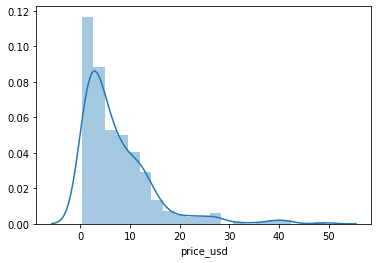

In [8]:
sns.distplot(dataset['price_usd'])

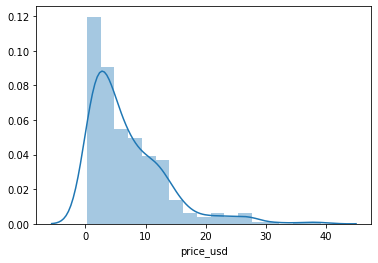

In [9]:
# Normalização dos dados do preço
q = dataset["price_usd"].quantile(0.99)
dataset = dataset[dataset['price_usd']<q]
#  grafico do preço normalizado
sns.distplot(dataset['price_usd'])

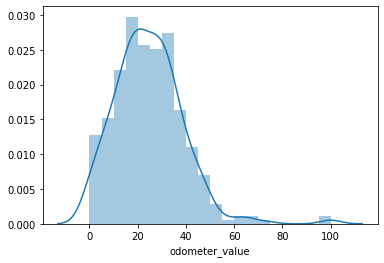

In [10]:
#  Normalização do set KM
sns.distplot(dataset['odometer_value'])

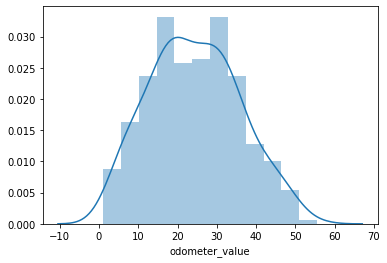

In [11]:
#  Normalizando odometer_value
q = dataset["odometer_value"].quantile(0.98)
dataset = dataset[(1<dataset['odometer_value']) 
                  & (dataset['odometer_value']<q)]
#  Dataset KM normalizado
sns.distplot(dataset['odometer_value'])

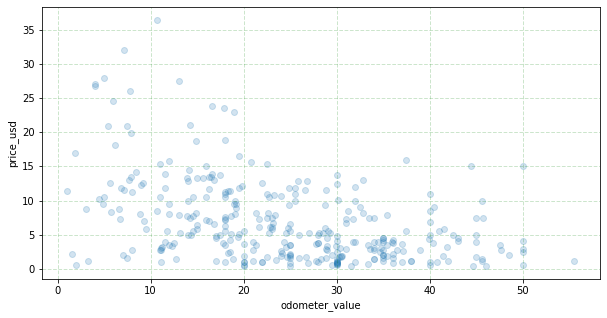

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset["odometer_value"],
            dataset["price_usd"], alpha=.2)
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', 
         linestyle='--', linewidth=1, alpha=0.2)

In [13]:
# Tamanho do dataset
dataset.shape

(325, 2)

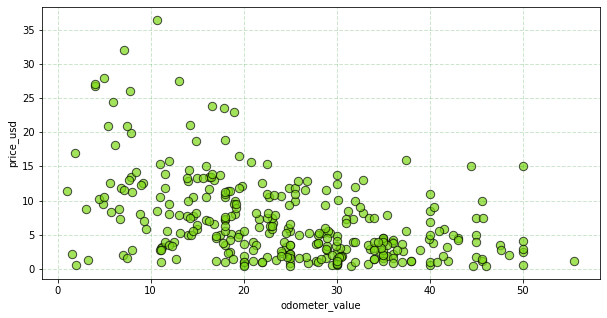

In [14]:
#  mesmo gráfico anterior para vizualização dos agrupamentos
plt.figure(figsize=(10, 5))
plt.scatter(dataset["odometer_value"], dataset["price_usd"],
            edgecolor='black', linewidth='1', s=70, alpha=0.7, c="#7dd815")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

# implementação da rede neural

In [15]:
#  inicia pesos e vieses com valor zero
def init(n):
    return {"w": np.zeros(n), "b": 0.0}

In [16]:
def predict(x, paramns):
    prediction = 0
    for weight, feature in zip(paramns["w"], x):
        prediction += weight * feature        
    prediction += paramns["b"]        
    return prediction

In [17]:
# Variavel recebe todos os valores que quilometragem
X = pd.DataFrame(dataset['odometer_value']).to_numpy()
# Variável y recebe todos os valores de preço
y = pd.DataFrame(dataset['price_usd']).to_numpy()
# usando função init() para iniciar os parametros da rede neural
n = len(dataset['odometer_value'])
model_paramns = init(n)

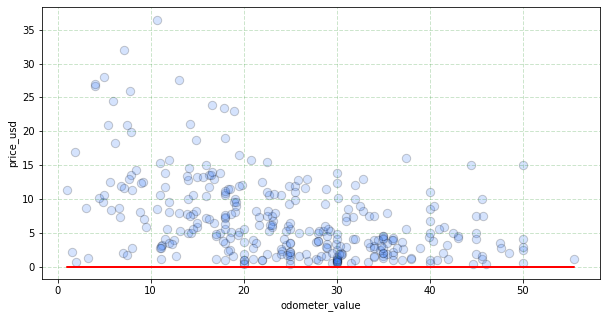

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(dataset["odometer_value"], dataset["price_usd"],
            edgecolor='black', linewidth='1', s=70, alpha=0.2, c="#3176f7")
# Plota uma linha atribuindo a cada valor coluna dataset['price_usd'], uma valor to parametro criando uma linha
plt.plot(dataset['odometer_value'], [predict([x], model_paramns) for x in dataset['price_usd']], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [19]:
def mae(predictions, targets):
    samp_num = len(predictions)
    acc_error = 0.0
    for prediction, target in zip(predictions, targets):
        acc_error += np.abs(prediction - target)
    mae_error = (1.0 / samp_num) * acc_error
    return mae_error

In [20]:
def mse(predictions, targets):
    samp_num = len(predictions)
    acc_error = 0.0
    for prediction, target in zip(predictions, targets):
        acc_error += (prediction - target)**2
    mae_error = (1.0 / (2*samp_num)) * acc_error 
    return mae_error

# Treino com MSE

In [21]:

def train(X, y, model_paramns, learning_rate=0.0005, iterations=20000):
    # iniciação do modelo com valores de pesos e vieses com valor zero
    predictions = [predict(x, model_paramns) for x in X]

    # Calcula o valor inicial do erro
    initial_error = mse(predictions, y)
    

    
    for i in range(iterations):
        # loop com somátorio inicial dos pesos e vieses
        acc_grad_w0 = 0
        acc_grad_b = 0   
        for x, y_target in zip(X, y):
            acc_grad_w0 += (predict(x, model_paramns) - y_target)*[x][0]
            acc_grad_b += (predict(x, model_paramns) - y_target)
            
        # mean of gradient
        w_grad = (1.0/len(X)) * acc_grad_w0
        b_grad = (1.0/len(X)) * acc_grad_b
        
        # propagação do gradiente acumulado para atualização
        model_paramns["w"][0] = model_paramns["w"][0] - learning_rate * w_grad
        model_paramns["b"] = model_paramns["b"] - learning_rate * b_grad
        
        if i % 500 == 0:
            print("\nEpoch {}:".format(i))
            print(" Error: {}".format(mse([predict(x, model_paramns) for x in X], y)))
            print(" paramns: w{}, b{}".format(model_paramns["w"][0], model_paramns["b"]))
            
    print("\nEpoch:")
    print(" Error: {}".format(mse([predict(x, model_paramns) for x in X], y)))
    print(" paramns: w{}, b{}".format(model_paramns["w"][0], model_paramns["b"]))

In [22]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [23]:
train(X, y, model_paramns, 0.05, 100)


Epoch 0:
 Error: [16164.67766398]
 paramns: w6.843973708967081, b[0.34390748]

Epoch:
 Error: [inf]
 paramns: w-1.2811834141282474e+154, b[-4.3026878e+152]


/Users/jamalmalik/opt/anaconda2/envs/datascience/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """


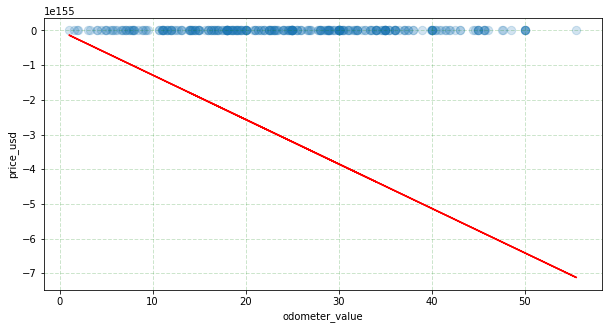

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [25]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [26]:
train(X, y, model_paramns, 0.0005, 10000)


Epoch 0:
 Error: [34.01708647]
 paramns: w0.0684397370896708, b[0.00343907]

Epoch 500:
 Error: [27.54106485]
 paramns: w0.1696705168722429, b[0.56438985]

Epoch 1000:
 Error: [26.40650778]
 paramns: w0.1517957821941201, b[1.09663422]

Epoch 1500:
 Error: [25.37027269]
 paramns: w0.1347131190080838, b[1.60529359]

Epoch 2000:
 Error: [24.42383888]
 paramns: w0.11838742876526771, b[2.09141307]

Epoch 2500:
 Error: [23.55942409]
 paramns: w0.10278516821597308, b[2.55599145]

Epoch 3000:
 Error: [22.76992044]
 paramns: w0.08787428049070876, b[2.99998328]

Epoch 3500:
 Error: [22.04883606]
 paramns: w0.07362412923519125, b[3.42430078]

Epoch 4000:
 Error: [21.39024166]
 paramns: w0.06000543566397907, b[3.82981578]

Epoch 4500:
 Error: [20.78872178]
 paramns: w0.046990218403407114, b[4.21736145]

Epoch 5000:
 Error: [20.23933029]
 paramns: w0.03455173600022187, b[4.58773407]

Epoch 5500:
 Error: [19.73754967]
 paramns: w0.02266443197779572, b[4.9416946]

Epoch 6000:
 Error: [19.27925392]
 

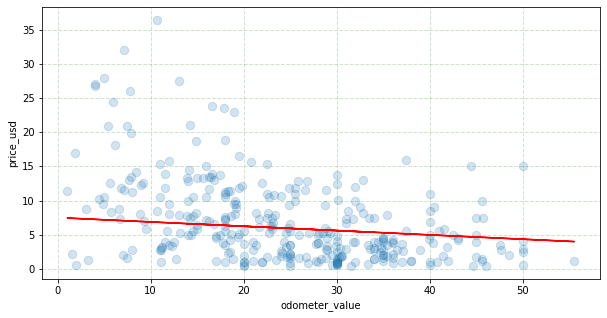

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [28]:
train(X, y, model_paramns, 0.0005, 20000)


Epoch 0:
 Error: [16.78806923]
 paramns: w-0.06321228991428324, b[7.49879]

Epoch 500:
 Error: [16.58537874]
 paramns: w-0.07076744024195972, b[7.7237548]

Epoch 1000:
 Error: [16.40025364]
 paramns: w-0.07798780410702666, b[7.93875089]

Epoch 1500:
 Error: [16.23117169]
 paramns: w-0.08488821668425559, b[8.14422]

Epoch 2000:
 Error: [16.07674257]
 paramns: w-0.0914828557669699, b[8.34058428]

Epoch 2500:
 Error: [15.93569644]
 paramns: w-0.09778527089715716, b[8.52824721]

Epoch 3000:
 Error: [15.80687354]
 paramns: w-0.10380841120476264, b[8.70759435]

Epoch 3500:
 Error: [15.68921456]
 paramns: w-0.1095646520133604, b[8.87899419]

Epoch 4000:
 Error: [15.58175205]
 paramns: w-0.11506582026685809, b[9.04279891]

Epoch 4500:
 Error: [15.48360236]
 paramns: w-0.12032321882949157, b[9.19934505]

Epoch 5000:
 Error: [15.39395843]
 paramns: w-0.12534764970902498, b[9.34895427]

Epoch 5500:
 Error: [15.31208314]
 paramns: w-0.130149436250877, b[9.49193395]

Epoch 6000:
 Error: [15.237303

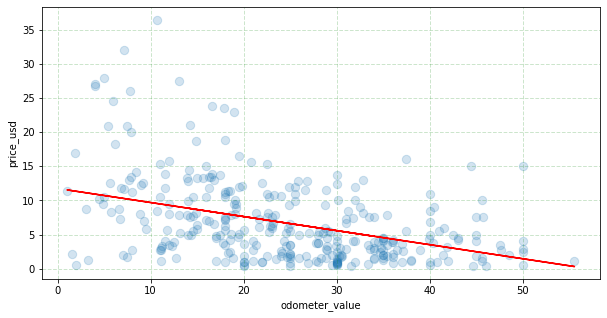

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [30]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [31]:
train(X, y, model_paramns, 0.0005, 40000)


Epoch 0:
 Error: [34.01708647]
 paramns: w0.0684397370896708, b[0.00343907]

Epoch 500:
 Error: [27.54106485]
 paramns: w0.1696705168722429, b[0.56438985]

Epoch 1000:
 Error: [26.40650778]
 paramns: w0.1517957821941201, b[1.09663422]

Epoch 1500:
 Error: [25.37027269]
 paramns: w0.1347131190080838, b[1.60529359]

Epoch 2000:
 Error: [24.42383888]
 paramns: w0.11838742876526771, b[2.09141307]

Epoch 2500:
 Error: [23.55942409]
 paramns: w0.10278516821597308, b[2.55599145]

Epoch 3000:
 Error: [22.76992044]
 paramns: w0.08787428049070876, b[2.99998328]

Epoch 3500:
 Error: [22.04883606]
 paramns: w0.07362412923519125, b[3.42430078]

Epoch 4000:
 Error: [21.39024166]
 paramns: w0.06000543566397907, b[3.82981578]

Epoch 4500:
 Error: [20.78872178]
 paramns: w0.046990218403407114, b[4.21736145]

Epoch 5000:
 Error: [20.23933029]
 paramns: w0.03455173600022187, b[4.58773407]

Epoch 5500:
 Error: [19.73754967]
 paramns: w0.02266443197779572, b[4.9416946]

Epoch 6000:
 Error: [19.27925392]
 

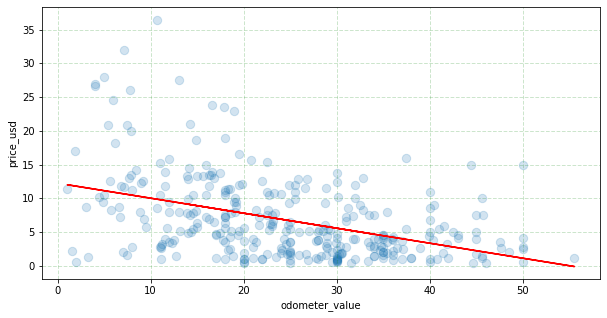

In [32]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

# Treino com MAE

In [33]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [34]:
def train(X, y, model_paramns, learning_rate=0.0005, iterations=20000):
    # iniciação do modelo com valores de pesos e vieses com valor zero
    predictions = [predict(x, model_paramns) for x in X]

    # Calcula o valor inicial do erro
    initial_error = mae(predictions, y)
    

    
    for i in range(iterations):
        # Comparação de diferença de preço predito e preço real
        acc_grad_w0 = 0
        acc_grad_b = 0   
        for x, y_target in zip(X, y):
            acc_grad_w0 += (predict(x, model_paramns) - y_target)*[x][0]
            acc_grad_b += (predict(x, model_paramns) - y_target)
            
        # mean of gradient
        w_grad = (1.0/len(X)) * acc_grad_w0
        b_grad = (1.0/len(X)) * acc_grad_b
        
        # propagação do gradiente acumulado para atualização
        model_paramns["w"][0] = model_paramns["w"][0] - learning_rate * w_grad
        model_paramns["b"] = model_paramns["b"] - learning_rate * b_grad
        
        if i % 500 == 0:
            print("\nEpoch {}:".format(i))
            print(" Error: {}".format(mae([predict(x, model_paramns) for x in X], y)))
            print(" paramns: w{}, b{}".format(model_paramns["w"][0], model_paramns["b"]))
            
    print("\nEpoch:")
    print(" Error: {}".format(mae([predict(x, model_paramns) for x in X], y)))
    print(" paramns: w{}, b{}".format(model_paramns["w"][0], model_paramns["b"]))

In [35]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [36]:
train(X, y, model_paramns, 0.05, 100)


Epoch 0:
 Error: [160.35831408]
 paramns: w6.843973708967081, b[0.34390748]

Epoch:
 Error: [3.12760299e+155]
 paramns: w-1.2811834141282474e+154, b[-4.3026878e+152]


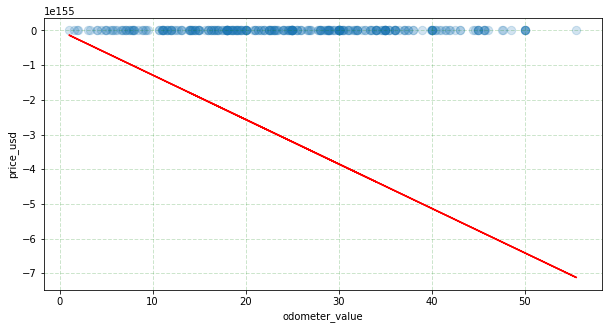

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [38]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [39]:
train(X, y, model_paramns, 0.0005, 10000)


Epoch 0:
 Error: [5.62660405]
 paramns: w0.0684397370896708, b[0.00343907]

Epoch 500:
 Error: [5.33617269]
 paramns: w0.1696705168722429, b[0.56438985]

Epoch 1000:
 Error: [5.20972385]
 paramns: w0.1517957821941201, b[1.09663422]

Epoch 1500:
 Error: [5.09636986]
 paramns: w0.1347131190080838, b[1.60529359]

Epoch 2000:
 Error: [4.99533135]
 paramns: w0.11838742876526771, b[2.09141307]

Epoch 2500:
 Error: [4.9080935]
 paramns: w0.10278516821597308, b[2.55599145]

Epoch 3000:
 Error: [4.82710272]
 paramns: w0.08787428049070876, b[2.99998328]

Epoch 3500:
 Error: [4.75285591]
 paramns: w0.07362412923519125, b[3.42430078]

Epoch 4000:
 Error: [4.68287349]
 paramns: w0.06000543566397907, b[3.82981578]

Epoch 4500:
 Error: [4.61724323]
 paramns: w0.046990218403407114, b[4.21736145]

Epoch 5000:
 Error: [4.55788384]
 paramns: w0.03455173600022187, b[4.58773407]

Epoch 5500:
 Error: [4.50283898]
 paramns: w0.02266443197779572, b[4.9416946]

Epoch 6000:
 Error: [4.45215223]
 paramns: w0.01

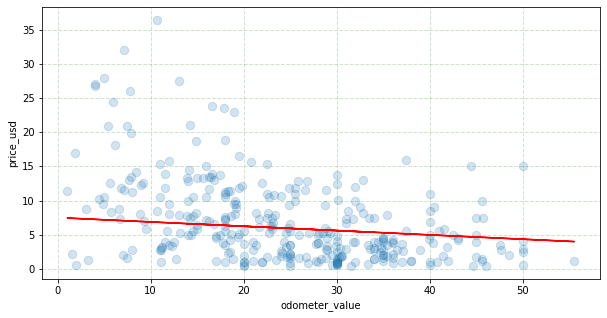

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [41]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [42]:
train(X, y, model_paramns, 0.0005, 20000)


Epoch 0:
 Error: [5.62660405]
 paramns: w0.0684397370896708, b[0.00343907]

Epoch 500:
 Error: [5.33617269]
 paramns: w0.1696705168722429, b[0.56438985]

Epoch 1000:
 Error: [5.20972385]
 paramns: w0.1517957821941201, b[1.09663422]

Epoch 1500:
 Error: [5.09636986]
 paramns: w0.1347131190080838, b[1.60529359]

Epoch 2000:
 Error: [4.99533135]
 paramns: w0.11838742876526771, b[2.09141307]

Epoch 2500:
 Error: [4.9080935]
 paramns: w0.10278516821597308, b[2.55599145]

Epoch 3000:
 Error: [4.82710272]
 paramns: w0.08787428049070876, b[2.99998328]

Epoch 3500:
 Error: [4.75285591]
 paramns: w0.07362412923519125, b[3.42430078]

Epoch 4000:
 Error: [4.68287349]
 paramns: w0.06000543566397907, b[3.82981578]

Epoch 4500:
 Error: [4.61724323]
 paramns: w0.046990218403407114, b[4.21736145]

Epoch 5000:
 Error: [4.55788384]
 paramns: w0.03455173600022187, b[4.58773407]

Epoch 5500:
 Error: [4.50283898]
 paramns: w0.02266443197779572, b[4.9416946]

Epoch 6000:
 Error: [4.45215223]
 paramns: w0.01

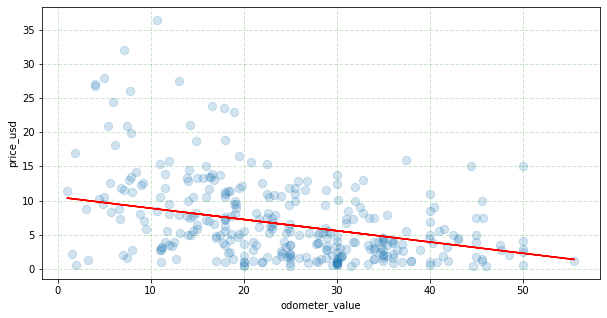

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)

In [44]:
n = len(dataset['odometer_value'])
model_paramns = init(n)

In [45]:
train(X, y, model_paramns, 0.0005, 40000)


Epoch 0:
 Error: [5.62660405]
 paramns: w0.0684397370896708, b[0.00343907]

Epoch 500:
 Error: [5.33617269]
 paramns: w0.1696705168722429, b[0.56438985]

Epoch 1000:
 Error: [5.20972385]
 paramns: w0.1517957821941201, b[1.09663422]

Epoch 1500:
 Error: [5.09636986]
 paramns: w0.1347131190080838, b[1.60529359]

Epoch 2000:
 Error: [4.99533135]
 paramns: w0.11838742876526771, b[2.09141307]

Epoch 2500:
 Error: [4.9080935]
 paramns: w0.10278516821597308, b[2.55599145]

Epoch 3000:
 Error: [4.82710272]
 paramns: w0.08787428049070876, b[2.99998328]

Epoch 3500:
 Error: [4.75285591]
 paramns: w0.07362412923519125, b[3.42430078]

Epoch 4000:
 Error: [4.68287349]
 paramns: w0.06000543566397907, b[3.82981578]

Epoch 4500:
 Error: [4.61724323]
 paramns: w0.046990218403407114, b[4.21736145]

Epoch 5000:
 Error: [4.55788384]
 paramns: w0.03455173600022187, b[4.58773407]

Epoch 5500:
 Error: [4.50283898]
 paramns: w0.02266443197779572, b[4.9416946]

Epoch 6000:
 Error: [4.45215223]
 paramns: w0.01

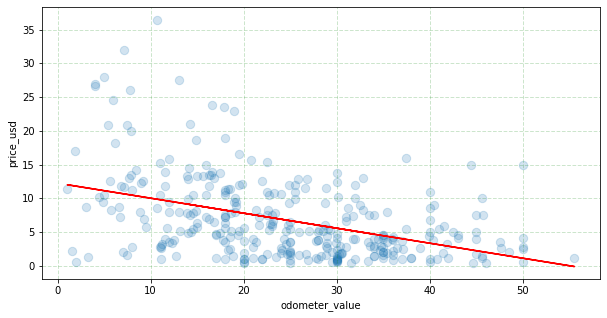

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, linewidth='1', s=70, alpha=0.2)
plt.plot(X, [predict([x], model_paramns) for x in dataset['odometer_value'] ], c="red")
plt.xlabel('odometer_value')
plt.ylabel('price_usd')
plt.grid(color='green', linestyle='--', linewidth=1, alpha=0.2)